# Nearest neighbor classifier

## The MNIST dataset

In this notebook we will be working with a subset of this data: a training set of 7,500 examples (of 60,000) and a test set of 1,000 examples (of 10,000).

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import time

## Load the training set
train_data = np.load('train_data.npy')
train_labels = np.load('train_labels.npy')

## Load the testing set
test_data = np.load('test_data.npy')
test_labels = np.load('test_labels.npy')

In [23]:
## Print out their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

('Training dataset dimensions: ', (7500, 784))
('Number of training labels: ', 7500)
('Testing dataset dimensions: ', (1000, 784))
('Number of testing labels: ', 1000)


In [24]:
## Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:")
print(dict(zip(test_digits, test_counts)))

Training set distribution:
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}
Test set distribution:
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


## Visualizing the data
Each data point is stored as 784-dimensional vector. To visualize a data point, we first reshape it to a 28x28 image.

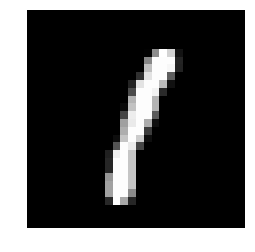

Label 1


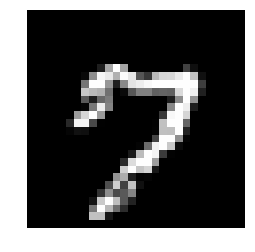

Label 7


In [25]:
## Define a function that displays a digit given its vector representation
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    if(dataset=="train"): 
        show_digit(train_data[index]) # index,
        label = train_labels[index]
    else:
        show_digit(test_data[index]) # index,
        label = test_labels[index]
    print("Label " + str(label))
    return

## View a data point in the training set
vis_image(5, "train")

## View a data point in the test set
vis_image(7, "test")

## Squared Euclidean distance

To compute nearest neighbors in our data set, we need to first be able to compute distances between data points. A natural distance function is _Euclidean distance_: for two vectors $x, y \in \mathbb{R}^d$, their Euclidean distance is defined as 
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$
Often we omit the square root, and simply compute _squared Euclidean distance_:
$$\|x - y\|^2 = \sum_{i=1}^d (x_i - y_i)^2.$$

In [26]:
## Computes squared Euclidean distance between two vectors.
def squared_dist(x,y):
    return np.sum(np.square(x-y))

## Computing nearest neighbors

Now that we have a distance function defined, we can now turn to nearest neighbor classification. 

In [27]:
## Takes a vector x and returns the index of its nearest neighbor in train_data
def find_NN(x):
    # Compute distances from x to every row in train_data
    distances = [squared_dist(x,train_data[i,]) for i in range(len(train_labels))]
    # Get the index of the smallest distance
    return np.argmin(distances)

## Takes a vector x and returns the class of its nearest neighbor in train_data
def NN_classifier(x):
    # Get the index of the the nearest neighbor
    index = find_NN(x)
    # Return its class
    return train_labels[index]

A success case:
('NN classification: ', 0)
('True label: ', 0)
The test image:


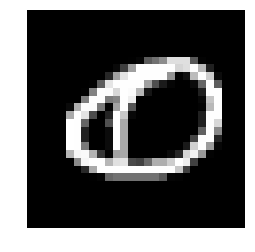

Label 0
The corresponding nearest neighbor image:


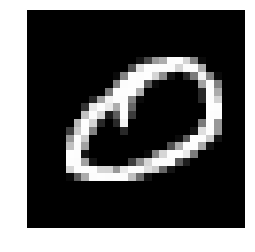

Label 0
('The index of its nearest neighbor in the training set:', 6696)


In [28]:
## A success case:
print("A success case:")
print("NN classification: ", NN_classifier(test_data[0,]))
print("True label: ", test_labels[0])
print("The test image:")
vis_image(0, "test")
print("The corresponding nearest neighbor image:")
vis_image(find_NN(test_data[0,]), "train")
print("The index of its nearest neighbor in the training set:", find_NN(test_data[0,]))

A failure case:
('NN classification: ', 2)
('True label: ', 3)
The test image:


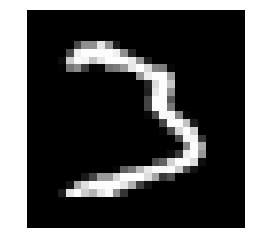

Label 3
The corresponding nearest neighbor image:


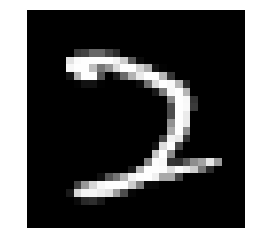

Label 2
('The index of its nearest neighbor in the training set:', 4455)


In [29]:
## A failure case:
print("A failure case:")
print("NN classification: ", NN_classifier(test_data[39,]))
print("True label: ", test_labels[39])
print("The test image:")
vis_image(39, "test")
print("The corresponding nearest neighbor image:")
vis_image(find_NN(test_data[39,]), "train")
print("The index of its nearest neighbor in the training set:", find_NN(test_data[39,]))

## Classifying all test data points

Now the nearest neighbor classifier is run over the full data set.

To classify each test point, the code takes a full pass over each of the 7500 training examples.

In [30]:
## Predict on each test data point (and time it!)
t_before = time.time()
test_predictions = [NN_classifier(test_data[i,]) for i in range(len(test_labels))]
t_after = time.time()

## Compute the error
err_positions = np.not_equal(test_predictions, test_labels)
error = float(np.sum(err_positions))/len(test_labels)

print("Error of nearest neighbor classifier: ", error)
print("Classification time (seconds): ", t_after - t_before)

('Error of nearest neighbor classifier: ', 0.046)
('Classification time (seconds): ', 151.79819703102112)


## Classifying all test data points (Using sklearn library)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski') # k = 3

t_before = time.time()
knn.fit(train_data, train_labels)
t_after = time.time()

## Compute training time
t_training = t_after - t_before
print("Time to build model (seconds): ", t_training)

## Get nearest neighbor predictions on testing data
t_before = time.time()
y_pred = knn.predict(test_data)
t_after = time.time()

## Compute testing time
t_testing = t_after - t_before
print("Time to classify test set (seconds): ", t_testing)

## Compute the accuracy
print('Accuracy: %.3f' % accuracy_score(test_labels, y_pred))

('Time to build model (seconds): ', 1.598869800567627)
('Time to classify test set (seconds): ', 32.31849217414856)
Accuracy: 0.948


## Faster method for nearest neighbor classification

Performing nearest neighbor classification in this way requires a full pass through the training set in order to classify a single point. This is a brute-force approach. When the volume of data is huge or its dimension is large, this repeated distance calculation can be very tedious and time consuming. To fasten up this process and to avoid measuring distances from all the points in the data set, some prepossessing of training data helps to search points (from training data) which are likely to be in the neighborhood (of the test data point).

`scikit-learn` has a useful nearest neighbor data structure - Ball Tree. 

A Ball Tree data structure attempts to partition the training data in such a way that only a portion of the training data has to be searched. It partitions data into balls (or hyperspheres). Then, it splits the data contained inside the ball and place 2 more balls. It keeps partitioning until there are only balls that contains a specified amount of points. 

In [31]:
from sklearn.neighbors import BallTree

## Build nearest neighbor structure on training data
t_before = time.time()
ball_tree = BallTree(train_data)
t_after = time.time()

## Compute training time
t_training = t_after - t_before
print("Time to build data structure (seconds): ", t_training)

## Get nearest neighbor predictions on testing data
t_before = time.time()
test_neighbors = np.squeeze(ball_tree.query(test_data, k=1, return_distance=False))
ball_tree_predictions = train_labels[test_neighbors]
t_after = time.time()

## Compute testing time
t_testing = t_after - t_before
print("Time to classify test set (seconds): ", t_testing)

## Verify that the predictions are the same
print("Ball tree produces same predictions as above? ", np.array_equal(test_predictions, ball_tree_predictions))

## Compute the error
err_positions = np.not_equal(ball_tree_predictions, test_labels)
error = float(np.sum(err_positions))/len(test_labels)
print("Error of nearest neighbor classifier: ", error)

('Time to build data structure (seconds): ', 1.9650688171386719)
('Time to classify test set (seconds): ', 24.9091739654541)
('Ball tree produces same predictions as above? ', True)
('Error of nearest neighbor classifier: ', 0.046)
